In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

from sklearn.externals import joblib


In [70]:
x = pd.read_csv('data.csv')

In [71]:
x.drop(['Отметка времени', '9)Что Вы видите на картинке? (необязательный вопрос)', '6)Что Вы видите на картинке? (необязательный вопрос)', 'Если У Вас где-то выбран ответ "иное", то напишите номер картинки и ваш ответ сюда'], inplace=True, axis=1)

In [72]:
ids = []
for i in x:
    if i == 'Какая у Вас профессия, должность в Вашей компании?':
        for k, j in enumerate(x[i]):
            if j == 'Другое':
                ids.append(k)
x.drop(x.index[ids], inplace=True)

In [73]:
#Выведим топ проффесий
# for u in pd.unique(np.ravel(y)):
#     print (np.count_nonzero(np.ravel(y)==u),u )
ar=['Game Designer','Software Architect','Security','Data Architect','Systemcoder','Evangelist','robot','Portable']

x=x[~x['Какая у Вас профессия, должность в Вашей компании?'].isin(ar)]
pd.unique(x['Какая у Вас профессия, должность в Вашей компании?'])

array(['BackEnd', 'Data Scientist', 'FrontEnd', 'Mobile', 'Product', 'Qa',
       'ui'], dtype=object)

In [74]:
y = pd.DataFrame(x['Какая у Вас профессия, должность в Вашей компании?'])
Xi=x
x.drop('Какая у Вас профессия, должность в Вашей компании?', inplace=True, axis=1)

In [75]:
# Label-encoding ответов
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(np.ravel(y))
y['le'] = le.transform(np.ravel(y))


In [76]:
# x = pd.get_dummies(x)
# print(data)
for column in x[2:]:
    m=pd.unique(x[column])
    try:
        le = preprocessing.LabelEncoder()
        le.fit(m)
        x[column]=le.transform(x[column])
#       print
    except:
        1

In [77]:
# y=pd.get_dummies(y)
# del y[0]
y=y['le']

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=.15, random_state=1)

In [79]:
len(x_train.columns)

19

In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =200,max_depth =5)
model.fit(x_train,y_train)
model.predict(x_validation)

array([0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 5, 0, 5, 0], dtype=int64)

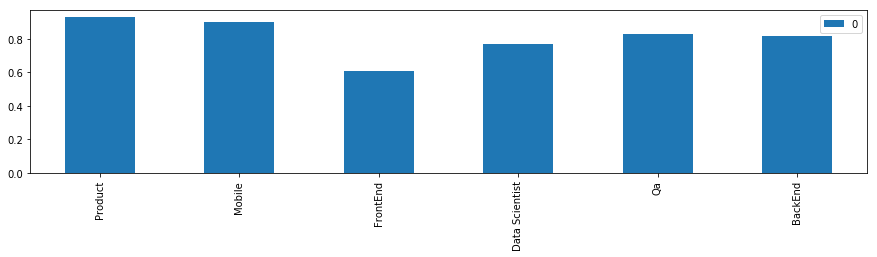

,0
Product,0.925926
Mobile,0.900000
FrontEnd,0.606061
Data Scientist,0.766667
Qa,0.826087
BackEnd,0.818182


<Figure size 432x288 with 0 Axes>

In [98]:
prof=['Product', 'Mobile', 'FrontEnd', 'Data Scientist', 'Qa', 'BackEnd']
res=[]
i=0
for p in prof:
    dy=y[y==i]
    d=x[x.index.isin(dy.index)]
#     print(len(dy))
    res.append((model.predict(d)==dy).mean())
    i+=1
    
p = pd.DataFrame()
p['name']=prof
p['mean']=res

p= pd.DataFrame(res,prof)
p.plot(kind='bar', figsize=(15, 3))
plt.show()
plt.savefig('cuolaty.png', dpi=600)
display(p)

In [97]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ["Apples","Apples","Apples","Oranges", "Bananas"]
y = ["5","10","3","10","5"]

data = [
  go.Histogram(
    histfunc = "count",
    y = y,
    x = x,
    name = "count"
  ),
  go.Histogram(
    histfunc = "sum",
    y = y,
    x = x,
    name = "sum"
  )
]

py.iplot(data, filename='binning function')

ModuleNotFoundError: No module named 'plotly'

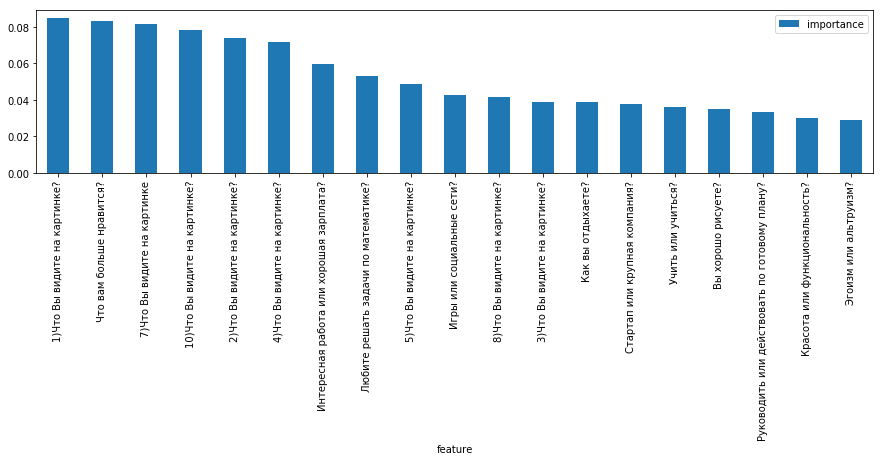

,importance
feature,
1)Что Вы видите на картинке?,0.085129
Что вам больше нравится?,0.083049
7)Что Вы видите на картинке,0.081520
10)Что Вы видите на картинке?,0.078602
2)Что Вы видите на картинке?,0.073939
4)Что Вы видите на картинке?,0.071934
Интересная работа или хорошая зарплата?,0.059456
Любите решать задачи по математике?,0.053144
5)Что Вы видите на картинке?,0.048711


In [45]:
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
if hasattr(model, 'coef_'):
    df_importances = sorted(list(zip(Xi.columns, model.coef_.ravel())), key=lambda tpl: tpl[1], reverse=True)
else:
    df_importances= sorted(list(zip(Xi.columns, np.array(model.feature_importances_).ravel())), key=lambda tpl: tpl[1], reverse=True)
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])
df_importances = df_importances.set_index('feature')
df_importances.plot(kind='bar', figsize=(15, 3))
plt.show()
display(df_importances)

In [46]:
# Save to file in the current working directory
joblib_file = "model.pkl"  
joblib.dump(model, joblib_file)

['model.pkl']

In [52]:
m = joblib.load(joblib_file)
# m.predict(x_validation)

In [65]:
a="111112221111111111111"
len(a)

21

In [66]:
ar=[]
print(len(a) )
for i in range(len(a)):
    ar.append(int(a[i]))
v=np.array(ar) 

v=np.delete(v,[5,8])
len(v)

21


19

In [67]:
m.predict([v])[0]

5